# Efficient Yelp API Calls (Core)

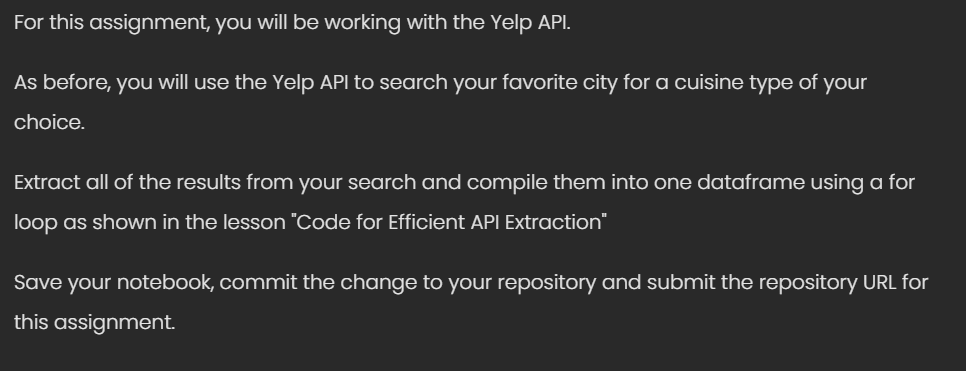

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, json, math, time
from yelpapi import YelpAPI
from tqdm.notebook import tqdm_notebook

In [4]:
with open('/Users/clove/.secret/yelp_api.json') as f:   
    login = json.load(f)
yelp_api = YelpAPI(login['api-key'], timeout_s=5.0)



In [5]:
# define search terms
LOCATION = 'Jackson, WY'
TERM = 'steak'

In [6]:
#instanciate json file/path, convention to include name/likeness
JSON_FILE = "Data/results_4_steak.json"
JSON_FILE

'Data/results_4_steak.json'

In [7]:
def create_json_file(JSON_FILE,  delete_if_exists=False):    
## Check if JSON_FILE exists
    file_exists = os.path.isfile(JSON_FILE)    
## If it DOES exist:
    if file_exists == True: 
## Check if user wants to delete if exists
        if delete_if_exists==True:           
            print(f"[!] {JSON_FILE} already exists. Deleting previous file...")
            ## delete file and confirm it no longer exits.
            os.remove(JSON_FILE)
            ## Recursive call to function after old file deleted
            create_json_file(JSON_FILE,delete_if_exists=False)
        else:
            print(f"[i] {JSON_FILE} already exists.")            
            ## If it does NOT exist:
    else:        
        ## INFORM USER AND SAVE EMPTY LIST
        print(f"[i] {JSON_FILE} not found. Saving empty list to new file.")
        ## CREATE ANY NEEDED FOLDERS
        # Get the Folder Name only
        folder = os.path.dirname(JSON_FILE)
        ## If JSON_FILE included a folder:
    if len(folder)>0:
    # create the folder
        os.makedirs(folder,exist_ok=True)
    ## Save empty list to start the json file
        with open(JSON_FILE,'w') as f:
            json.dump([],f)  

In [8]:
## Create a new empty json file (exist the previous if it exists)
create_json_file(JSON_FILE, delete_if_exists=True)
## Load previous results and use len of results for offset
with open(JSON_FILE,'r') as f:
    previous_results = json.load(f)
    
## set offset based on previous results
n_results = len(previous_results)
print(f'- {n_results} previous results found.')
# use our yelp_api variable's search_query method to perform our API call
results = yelp_api.search_query(location=LOCATION,
                                term=TERM,
                               offset=n_results)
## How many results total?
total_results = results['total']
## How many did we get the details for?
results_per_page = len(results['businesses'])
# Use math.ceil to round up for the total number of pages of results.
n_pages = math.ceil((results['total']-n_results)/ results_per_page)
n_pages

[i] Data/results_4_steak.json not found. Saving empty list to new file.
- 0 previous results found.


4

In [9]:
for i in tqdm_notebook( range(1,n_pages+1)):
    
    ## Read in results in progress file and check the length
    with open(JSON_FILE, 'r') as f:
        previous_results = json.load(f)
    ## save number of results for to use as offset
    n_results = len(previous_results)
    
    if (n_results + results_per_page) > 1000:
        print('Exceeded 1000 api calls. Stopping loop.')
        break
    
    ## use n_results as the OFFSET 
    results = yelp_api.search_query(location=LOCATION,
                                    term=TERM, 
                                    offset=n_results)
    
    
    
    ## append new results and save to file
    previous_results.extend(results['businesses'])
    
    # display(previous_results)
    with open(JSON_FILE,'w') as f:
        json.dump(previous_results,f)
    
    time.sleep(.2)

  0%|          | 0/4 [00:00<?, ?it/s]

In [10]:
# load final results
final_df = pd.read_json(JSON_FILE)
display(final_df.head(), final_df.tail())


,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance
0,XG35JLbcIIkEzM7icHS6IA,gun-barrel-steak-and-game-house-jackson-2,Gun Barrel Steak and Game House,https://s3-media1.fl.yelpcdn.com/bphoto/JucDjP...,False,https://www.yelp.com/biz/gun-barrel-steak-and-...,738,"[{'alias': 'steak', 'title': 'Steakhouses'}, {...",4.0,"{'latitude': 43.473926, 'longitude': -110.78148}",[],$$$,"{'address1': '862 W Broadway Ave', 'address2':...",+13077333287,(307) 733-3287,1160.633940
1,0NFRNbEC8mcnXOQNYABc2Q,million-dollar-cowboy-steakhouse-jackson-9,Million Dollar Cowboy Steakhouse,https://s3-media3.fl.yelpcdn.com/bphoto/F-FaJw...,False,https://www.yelp.com/biz/million-dollar-cowboy...,61,"[{'alias': 'steak', 'title': 'Steakhouses'}]",4.0,"{'latitude': 43.479877, 'longitude': -110.762891}",[],NaN,"{'address1': '25 N Cache St', 'address2': '', ...",+13077331270,(307) 733-1270,1742.622904
2,4smfob4LS6BalU2h-Psa5Q,gather-in-jackson-hole-jackson,Gather in Jackson Hole,https://s3-media3.fl.yelpcdn.com/bphoto/3rnIWi...,False,https://www.yelp.com/biz/gather-in-jackson-hol...,891,"[{'alias': 'newamerican', 'title': 'American (...",4.5,"{'latitude': 43.478733, 'longitude': -110.763525}",[],$$$,"{'address1': '72 S Glenwood St', 'address2': '...",+13072641820,(307) 264-1820,1603.420609
3,q56Txb8gSs13KkjPou3ZCA,local-restaurant-and-bar-jackson,Local Restaurant & Bar,https://s3-media3.fl.yelpcdn.com/bphoto/8EQ3rN...,False,https://www.yelp.com/biz/local-restaurant-and-...,884,"[{'alias': 'newamerican', 'title': 'American (...",4.0,"{'latitude': 43.4799497, 'longitude': -110.762...",[delivery],$$$,"{'address1': '55 N Cache St', 'address2': '', ...",+13072011717,(307) 201-1717,1762.221458
4,mD2tI_hbnQdYVKTTTEPdcg,the-whistling-grizzly-jackson-2,The Whistling Grizzly,https://s3-media1.fl.yelpcdn.com/bphoto/RrTpRg...,False,https://www.yelp.com/biz/the-whistling-grizzly...,88,"[{'alias': 'breakfast_brunch', 'title': 'Break...",4.5,"{'latitude': 43.47367, 'longitude': -110.78363}",[],$$,"{'address1': '930 W Broadway', 'address2': '',...",+13076997227,(307) 699-7227,1257.228122


,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance
62,SFNtmQekUAIFtgTEprNGVg,noras-fish-creek-inn-wilson,Nora's Fish Creek Inn,https://s3-media2.fl.yelpcdn.com/bphoto/jyj2pB...,False,https://www.yelp.com/biz/noras-fish-creek-inn-...,248,"[{'alias': 'tradamerican', 'title': 'American ...",4.0,"{'latitude': 43.4979495326871, 'longitude': -1...",[pickup],$$,"{'address1': '5600 W Hwy 22', 'address2': None...",+13077338288,(307) 733-8288,8990.815605
63,QHz59nUoZ1WPfvPdzCBlTw,picas-mexican-taqueria-jackson-2,Pica's Mexican Taqueria,https://s3-media1.fl.yelpcdn.com/bphoto/I8HPda...,False,https://www.yelp.com/biz/picas-mexican-taqueri...,164,"[{'alias': 'mexican', 'title': 'Mexican'}]",3.0,"{'latitude': 43.4717216491699, 'longitude': -1...",[],$$,"{'address1': '1160 Alpine Ln', 'address2': Non...",+13077344457,(307) 734-4457,1371.611288
64,xIXDQ5A_13DggVqwkFTS6A,subway-jackson-105,Subway,https://s3-media1.fl.yelpcdn.com/bphoto/_mk6tJ...,False,https://www.yelp.com/biz/subway-jackson-105?ad...,14,"[{'alias': 'hotdogs', 'title': 'Fast Food'}, {...",2.0,"{'latitude': 43.46931283693088, 'longitude': -...",[],$,"{'address1': '520 S Hwy 89', 'address2': 'Unit...",+13077391965,(307) 739-1965,1580.727738
65,_BtUVJmJlc8PPYlHMSFumw,tijuana-jackson,Tijuana,https://s3-media4.fl.yelpcdn.com/bphoto/VwZL0_...,False,https://www.yelp.com/biz/tijuana-jackson?adjus...,66,"[{'alias': 'mexican', 'title': 'Mexican'}]",2.5,"{'latitude': 43.46932172942936, 'longitude': -...",[],$$,"{'address1': '520 S US Hwy 89', 'address2': ''...",+13077333554,(307) 733-3554,1536.913435
66,jnfTjW0M9XXj3RoxTGk4HQ,gamefish-teton-village,Gamefish,https://s3-media1.fl.yelpcdn.com/bphoto/C5tJHX...,False,https://www.yelp.com/biz/gamefish-teton-villag...,24,"[{'alias': 'seafood', 'title': 'Seafood'}, {'a...",3.0,"{'latitude': 43.588592, 'longitude': -110.826362}",[],$$$,"{'address1': '7710 Granite Lp Rd', 'address2':...",+13077326040,(307) 732-6040,14252.780159


In [11]:
final_df.duplicated(subset='id').sum()

0

In [12]:
# save the final results to a compressed csv
final_df.to_csv('Data/final_Results_$_Steak.csv.gz', compression='gzip',index=False)